# 7.4 Exercises

## Breast Cancer Wisconsin (Diagnostic)

The **Breast Cancer Wisconsin (Diagnostic)** dataset is a collection of data used for predicting whether a breast tumor is malignant (cancerous) or benign (non-cancerous). It contains information derived from images of breast mass samples obtained through fine needle aspirates.

The dataset consists of 569 samples with 30 features that measure various characteristics of cell nuclei, such as radius, texture, perimeter, and area. Each sample is labeled as either **malignant (1)** or **benign (0)**.

To import the dataset in Python, you can follow the installation steps on the official website (provided here).

##  Exericse 1
1. Take an initial look at the data. What are the features, and what is the dependent variable?
2. Perfrom logistisc regression using all features (X=breast_cancer_wisconsin_diagnostic.data.features) and the target (targets)
3. What do the coefficients and intercept indicate?



In [1]:

# Load the dataset with the instructions from the website
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from ucimlrepo import fetch_ucirepo

# Fetch the Breast Cancer Wisconsin dataset
breast_cancer_wisconsin_diagnostic = fetch_ucirepo(id=17)

# Data as pandas DataFrames
X = breast_cancer_wisconsin_diagnostic.data.features
y = breast_cancer_wisconsin_diagnostic.data.targets

# Display metadata and variable information
print(breast_cancer_wisconsin_diagnostic.metadata)
print(breast_cancer_wisconsin_diagnostic.variables)





##SOLUTION##

# Fit the logistic regression model
logr = LogisticRegression()  # Increased max_iter for convergence
logr.fit(X, y)

# Get the intercept and coefficients
intercept = logr.intercept_[0]
coef = logr.coef_[0]
print(f"Intercept: {intercept}")
print("Coefficients:", coef)





{'uci_id': 17, 'name': 'Breast Cancer Wisconsin (Diagnostic)', 'repository_url': 'https://archive.ics.uci.edu/dataset/17/breast+cancer+wisconsin+diagnostic', 'data_url': 'https://archive.ics.uci.edu/static/public/17/data.csv', 'abstract': 'Diagnostic Wisconsin Breast Cancer Database.', 'area': 'Health and Medicine', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 569, 'num_features': 30, 'feature_types': ['Real'], 'demographics': [], 'target_col': ['Diagnosis'], 'index_col': ['ID'], 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1993, 'last_updated': 'Fri Nov 03 2023', 'dataset_doi': '10.24432/C5DW2B', 'creators': ['William Wolberg', 'Olvi Mangasarian', 'Nick Street', 'W. Street'], 'intro_paper': {'ID': 230, 'type': 'NATIVE', 'title': 'Nuclear feature extraction for breast tumor diagnosis', 'authors': 'W. Street, W. Wolberg, O. Mangasarian', 'venue': 'Electronic imaging', 'year': 1993, 'journal': None, 'DOI': '1

c:\Users\laptop\AppData\Local\miniconda3\envs\psy111\Lib\site-packages\sklearn\utils\validation.py:1339: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\laptop\AppData\Local\miniconda3\envs\psy111\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(



## Exercise 2
1. Evaluate the model by printing its accuracy.
2. Plot a confusion matrix for the target variable.
3. Review the classification report and interpret the results.

Predicted accuarcy:0.9472759226713533
Confusion Matrix:
[[346  11]
 [ 19 193]]


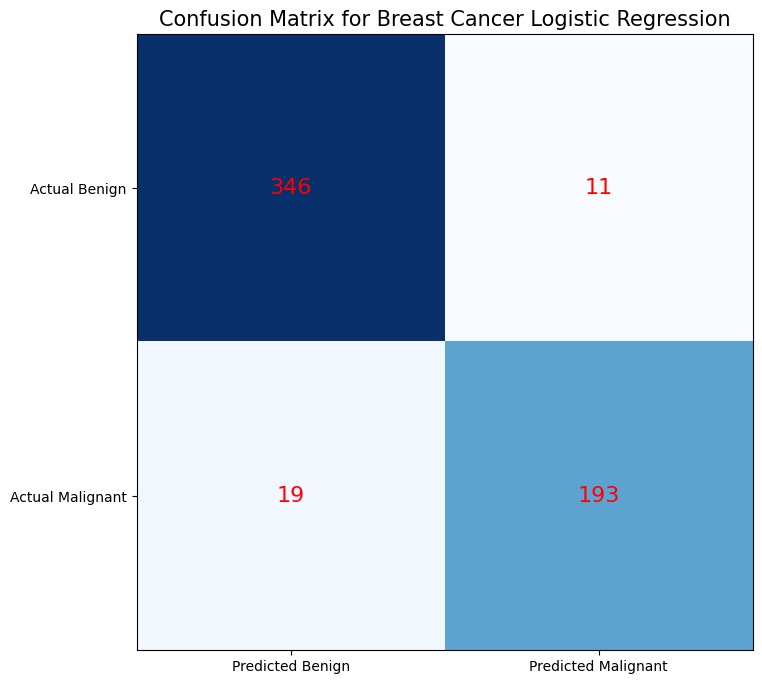

              precision    recall  f1-score   support

           B       0.95      0.97      0.96       357
           M       0.95      0.91      0.93       212

    accuracy                           0.95       569
   macro avg       0.95      0.94      0.94       569
weighted avg       0.95      0.95      0.95       569



In [9]:
##SOLUTION##
# Evaluate the model using predictions
print(f"Predicted accuarcy:{logr.score(X, y)}")

# Confusion Matrix
cm = confusion_matrix(y, logr.predict(X))
print("Confusion Matrix:")
print(cm)

# Visualize the Confusion Matrix
# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm, cmap='Blues')  # Use a blue colormap for the matrix
ax.grid(False)

# Set x and y axis labels
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted Benign', 'Predicted Malignant'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual Benign', 'Actual Malignant'))
ax.set_ylim(1.5, -0.5)

# Annotate the confusion matrix
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red', fontsize=16)

# Add title and show the plot
plt.title('Confusion Matrix for Breast Cancer Logistic Regression', fontsize=15)
plt.show()

#classification report
from sklearn.metrics import classification_report
report = classification_report(y, logr.predict(X))
print(report)